<a href="https://colab.research.google.com/github/RostislavB74/NN_HW9/blob/main/GoIT_HW_9_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
import itertools
%matplotlib inline
from keras import optimizers
from keras.optimizers import Adam, RMSprop, SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [87]:
#Завантажуємо Датасет
from keras.datasets import fashion_mnist

Параметри

In [137]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [158]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 28*28 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.0001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 512 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару
n_hidden_3 = 512 # кількість нейронів 3-го шару
n_hidden_4 = 1024 # кількість нейронів 3-го шару

In [97]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [98]:
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

# Модель 1

3 шари + Дропаут 0,3

In [99]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.3),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [100]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 256)               200960    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 2nd_layer (Dense)           (None, 512)               131584    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 Hypothesis (Dense)          (None, 10)                5130      
                                                                 
Total params: 337674 (1.29 MB)
Trainable params: 33767

In [101]:
model_1.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [120]:
model_1.save('512_model')

# Модель 2

3 шари + Дропаут 0.1

In [121]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_3, activation='relu', name='3nd_layer'),
    Dropout(0.1),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [122]:
model_2.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [123]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 256)               200960    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 2nd_layer (Dense)           (None, 512)               131584    
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 3nd_layer (Dense)           (None, 512)               262656    
                                                                 
 dropout_21 (Dropout)        (None, 512)              

In [124]:
model_2.save('2_model')

# Модель 3

4 шари + дропаут 0.1

In [159]:
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_3, activation='relu', name='3nd_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_4, activation='relu', name='4th_layer'),
    Dropout(0.1),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [160]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_26 (Dropout)        (None, 256)               0         
                                                                 
 3nd_layer (Dense)           (None, 512)               131584    
                                                                 
 dropout_27 (Dropout)        (None, 512)              

In [162]:
model_3.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [163]:
model_3.save('3_model')

# Граємось далі

In [84]:
from keras.utils import to_categorical

# Перетворення міток у форму one-hot encoding
y_train_1 = to_categorical(y_train_1)


# Тренування моделі 1

30 епох батч 512

In [32]:
model_t1= keras.models.load_model("1_model")
history = model_t1.fit(x_train_1, y_train_1, batch_size=512, epochs=30, validation_split=0.2, verbose=1)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Accuracy:", final_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Epoch 1/30
94/94 [==============================] - 2s 16ms/step - loss: 0.3838 - accuracy: 0.2253 - val_loss: 0.2593 - val_accuracy: 0.6277
Epoch 2/30
94/94 [==============================] - 1s 12ms/step - loss: 0.2483 - accuracy: 0.4925 - val_loss: 0.1867 - val_accuracy: 0.6758
Epoch 3/30
94/94 [==============================] - 1s 12ms/step - loss: 0.1986 - accuracy: 0.6007 - val_loss: 0.1562 - val_accuracy: 0.6918
Epoch 4/30
94/94 [==============================] - 1s 12ms/step - loss: 0.1733 - accuracy: 0.6457 - val_loss: 0.1392 - val_accuracy: 0.7193
Epoch 5/30
94/94 [==============================] - 1s 12ms/step - loss: 0.1568 - accuracy: 0.6824 - val_loss: 0.1283 - val_accuracy: 0.7345
Epoch 6/30
94/94 [==============================] - 2s 19ms/step - loss: 0.1457 - accuracy: 0.7039 - val_loss: 0.1207 - val_accuracy: 0.7545
Epoch 7/30
94/94 [==============================] - 3s 36ms/step - loss: 0.1372 - accuracy: 0.7268 - val_loss: 0.1147 - val_accuracy: 0.7692
Epoch 8/30
94

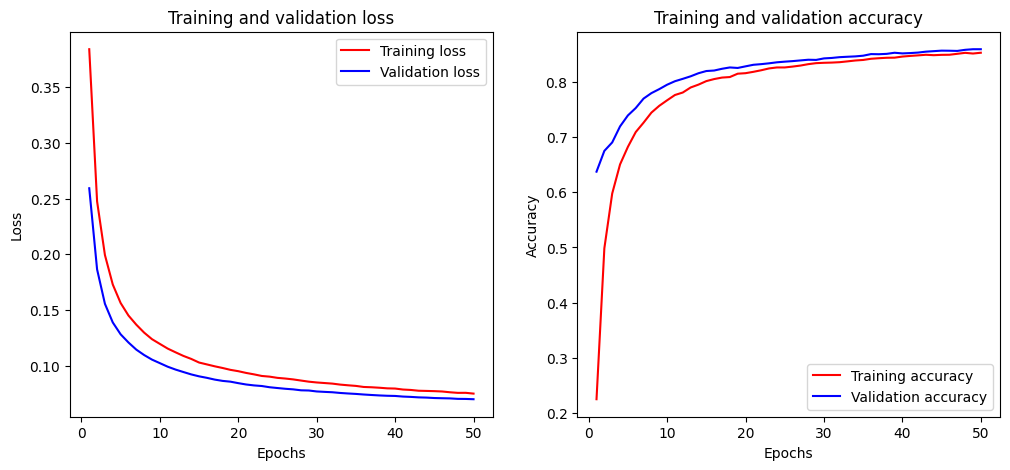

In [71]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

50 епох батч 512

In [65]:
model_t1= keras.models.load_model("1_model")
history = model_t1.fit(x_train_1, y_train_1, batch_size=512, epochs=50, validation_split=0.2, verbose=1)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Accuracy:", final_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Epoch 1/50
94/94 [==============================] - 3s 20ms/step - loss: 0.3839 - accuracy: 0.2245 - val_loss: 0.2592 - val_accuracy: 0.6375
Epoch 2/50
94/94 [==============================] - 1s 13ms/step - loss: 0.2475 - accuracy: 0.4985 - val_loss: 0.1865 - val_accuracy: 0.6752
Epoch 3/50
94/94 [==============================] - 1s 12ms/step - loss: 0.1993 - accuracy: 0.5978 - val_loss: 0.1556 - val_accuracy: 0.6906
Epoch 4/50
94/94 [==============================] - 1s 12ms/step - loss: 0.1729 - accuracy: 0.6506 - val_loss: 0.1389 - val_accuracy: 0.7197
Epoch 5/50
94/94 [==============================] - 2s 21ms/step - loss: 0.1564 - accuracy: 0.6825 - val_loss: 0.1283 - val_accuracy: 0.7396
Epoch 6/50
94/94 [==============================] - 2s 17ms/step - loss: 0.1451 - accuracy: 0.7094 - val_loss: 0.1209 - val_accuracy: 0.7530
Epoch 7/50
94/94 [==============================] - 1s 12ms/step - loss: 0.1369 - accuracy: 0.7265 - val_loss: 0.1145 - val_accuracy: 0.7702
Epoch 8/50
94

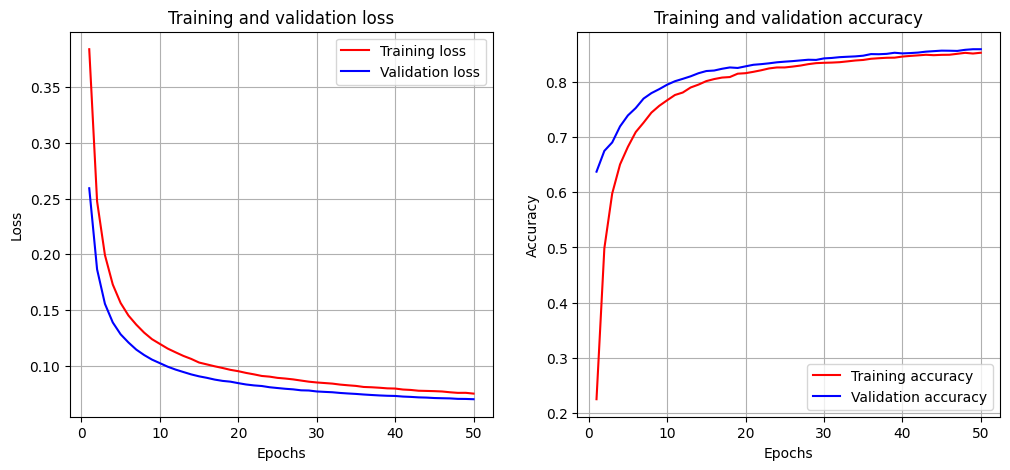

In [72]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(1)
plt.legend()

plt.show()

In [34]:
import pickle


with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


In [41]:

with open('history_1.pkl', 'wb') as f:
    pickle.dump(history.history, f)

30 епох батч 512 ReduceLROnPlateau

In [110]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model_t1= keras.models.load_model("512_model")
history = model_t1.fit(x_train_1, y_train_1_categorical,
                       batch_size=512,
                       epochs=30,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])


Epoch 1/30
94/94 [==============================] - 3s 26ms/step - loss: 0.3472 - accuracy: 0.3226 - val_loss: 0.2208 - val_accuracy: 0.6595 - lr: 1.0000e-04
Epoch 2/30
94/94 [==============================] - 2s 24ms/step - loss: 0.2068 - accuracy: 0.6019 - val_loss: 0.1594 - val_accuracy: 0.6781 - lr: 1.0000e-04
Epoch 3/30
94/94 [==============================] - 3s 33ms/step - loss: 0.1677 - accuracy: 0.6640 - val_loss: 0.1379 - val_accuracy: 0.7036 - lr: 1.0000e-04
Epoch 4/30
94/94 [==============================] - 3s 27ms/step - loss: 0.1481 - accuracy: 0.7049 - val_loss: 0.1253 - val_accuracy: 0.7398 - lr: 1.0000e-04
Epoch 5/30
94/94 [==============================] - 2s 24ms/step - loss: 0.1362 - accuracy: 0.7296 - val_loss: 0.1169 - val_accuracy: 0.7602 - lr: 1.0000e-04
Epoch 6/30
94/94 [==============================] - 2s 24ms/step - loss: 0.1266 - accuracy: 0.7522 - val_loss: 0.1104 - val_accuracy: 0.7771 - lr: 1.0000e-04
Epoch 7/30
94/94 [==============================] - 

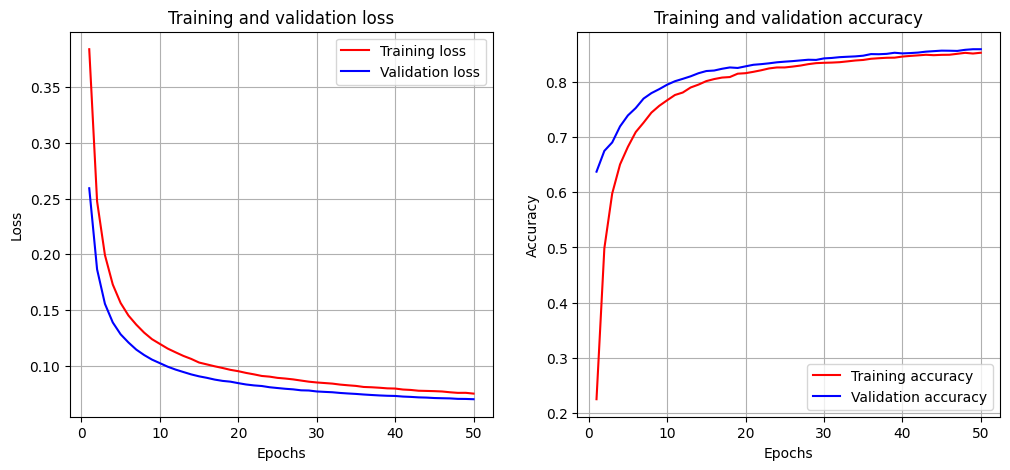

In [111]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(1)
plt.legend()

plt.show()

# Model_2

 100 епох батч 256 ReduceLROnPlateau

In [164]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model_t2= keras.models.load_model("2_model")
history = model_t2.fit(x_train_1, y_train_1_categorical,
                       batch_size=256,
                       epochs=100,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])


Epoch 1/100
188/188 [==============================] - 6s 26ms/step - loss: 0.2479 - accuracy: 0.5229 - val_loss: 0.1458 - val_accuracy: 0.7050 - lr: 1.0000e-04
Epoch 2/100
188/188 [==============================] - 6s 31ms/step - loss: 0.1387 - accuracy: 0.7166 - val_loss: 0.1149 - val_accuracy: 0.7731 - lr: 1.0000e-04
Epoch 3/100
188/188 [==============================] - 5s 25ms/step - loss: 0.1161 - accuracy: 0.7707 - val_loss: 0.1012 - val_accuracy: 0.8032 - lr: 1.0000e-04
Epoch 4/100
188/188 [==============================] - 5s 29ms/step - loss: 0.1038 - accuracy: 0.7977 - val_loss: 0.0924 - val_accuracy: 0.8217 - lr: 1.0000e-04
Epoch 5/100
188/188 [==============================] - 5s 27ms/step - loss: 0.0959 - accuracy: 0.8163 - val_loss: 0.0880 - val_accuracy: 0.8288 - lr: 1.0000e-04
Epoch 6/100
188/188 [==============================] - 5s 25ms/step - loss: 0.0903 - accuracy: 0.8259 - val_loss: 0.0841 - val_accuracy: 0.8352 - lr: 1.0000e-04
Epoch 7/100
188/188 [=============

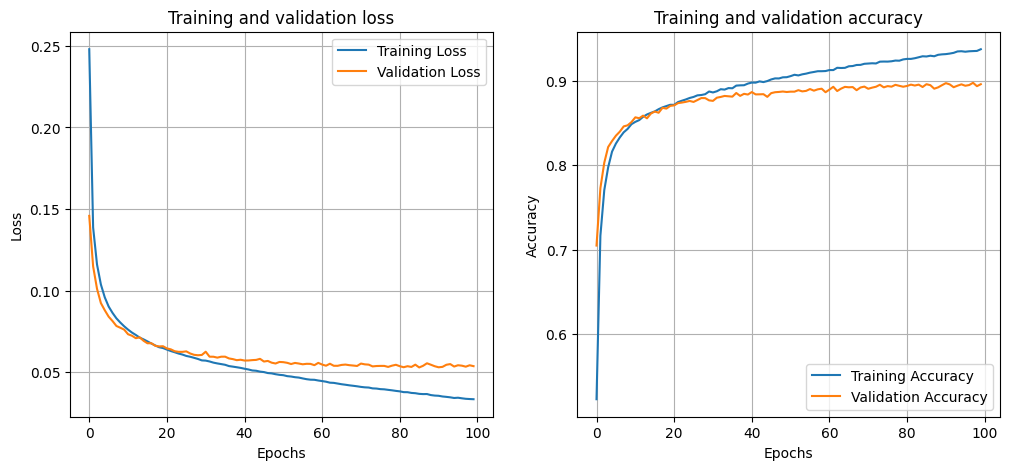

In [165]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(1)
plt.legend()

plt.show()

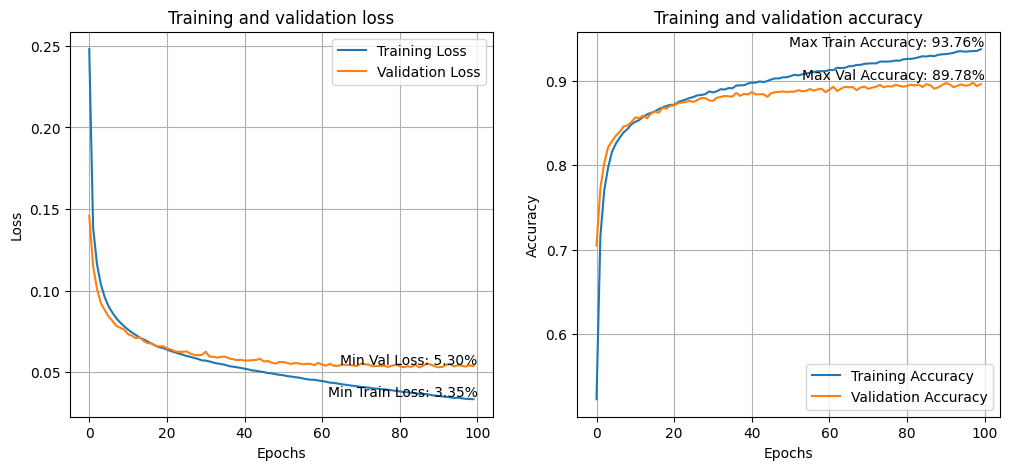

In [168]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']), f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']), f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.show()



# Тестування на моделі 2

In [169]:
y_test_1_categorical = to_categorical(y_test_1)

In [170]:
test_loss_1, test_acc_1 = model_t2.evaluate(x_test_1, y_test_1_categorical)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0580 - accuracy: 0.8906
Test accuracy: 0.8906000256538391
Test loss: 0.05795580893754959


1/1 [==============================] - 0s 66ms/step
[[8.4897150e-14 3.7136605e-10 3.4792064e-13 2.7177949e-11 3.0293339e-12
  1.3967541e-10 5.9856720e-13 1.0000000e+00 1.8817403e-10 1.3085456e-09]]
Предмет що розпізнаний: Sneaker


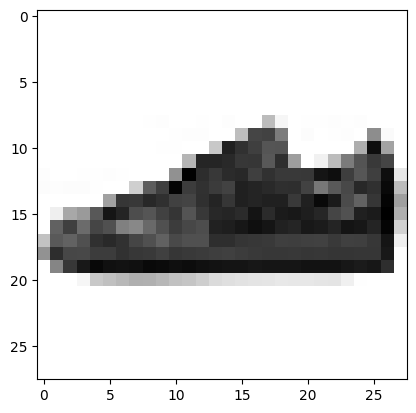

In [171]:
n=22
x=np.expand_dims(x_test_1[n], axis=0)
res = model_t2.predict(x)
print(res)
print(f'Предмет що розпізнаний: {class_names[np.argmax(res)]}')
plt.imshow(x_test_1[n], cmap=plt.cm.binary)
plt.show()

In [172]:
predictions = model_t2.predict(x_train_1)

1875/1875 [==============================] - 6s 3ms/step


In [173]:
predictions[22]

array([2.2576130e-03, 1.4149982e-03, 1.0691666e-01, 1.0937361e-02,
       8.4319377e-01, 3.5249607e-07, 2.3430772e-02, 1.6690094e-03,
       1.0042543e-02, 1.3696426e-04], dtype=float32)

In [174]:
class_names[np.argmax(predictions[22])]

'Coat'

In [175]:
class_names[y_train_1[22]]

'Coat'

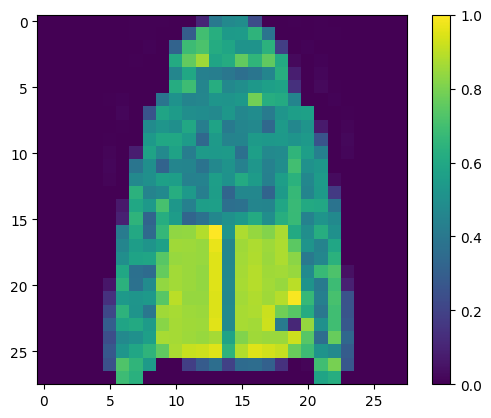

In [176]:
plt.figure()
plt.imshow(x_train_1[22])
plt.colorbar()
plt.grid(False)

In [177]:
class_names[np.argmax(predictions[22])]

'Coat'

In [178]:
predictions_all = model_t2.predict(x_test_1)
predictions_all = np.argmax(predictions_all, axis=1)

predicted_class_names = [class_names[label] for label in predictions_all]
true_class_names = [class_names[label] for label in y_test_1]


313/313 [==============================] - 1s 3ms/step


In [179]:
from tabulate import tabulate

# Prepare data for the table
table_data = []
for i in range(30):
    predicted_class = predicted_class_names[i]
    true_class = true_class_names[i]
    if predicted_class != true_class:
        table_data.append([f"\033[91m{predicted_class}\033[0m", true_class])
    else:
        table_data.append([predicted_class, true_class])

# Print the table
print(tabulate(table_data, headers=["Predicted Class", "True Class"], tablefmt="fancy_grid"))


╒═══════════════════╤══════════════╕
│ Predicted Class   │ True Class   │
╞═══════════════════╪══════════════╡
│ Ankle boot        │ Ankle boot   │
├───────────────────┼──────────────┤
│ Pullover          │ Pullover     │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│ Sneaker           │ Sneaker      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│

In [180]:
mask=predictions_all==y_test_1
print(mask[:30])
x_false=x_test_1[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True False
  True False  True  True  True  True]
(1094, 28, 28)


In [181]:
print(f'Кількість помилкових значень: {len(x_false)}')


Кількість помилкових значень: 1094


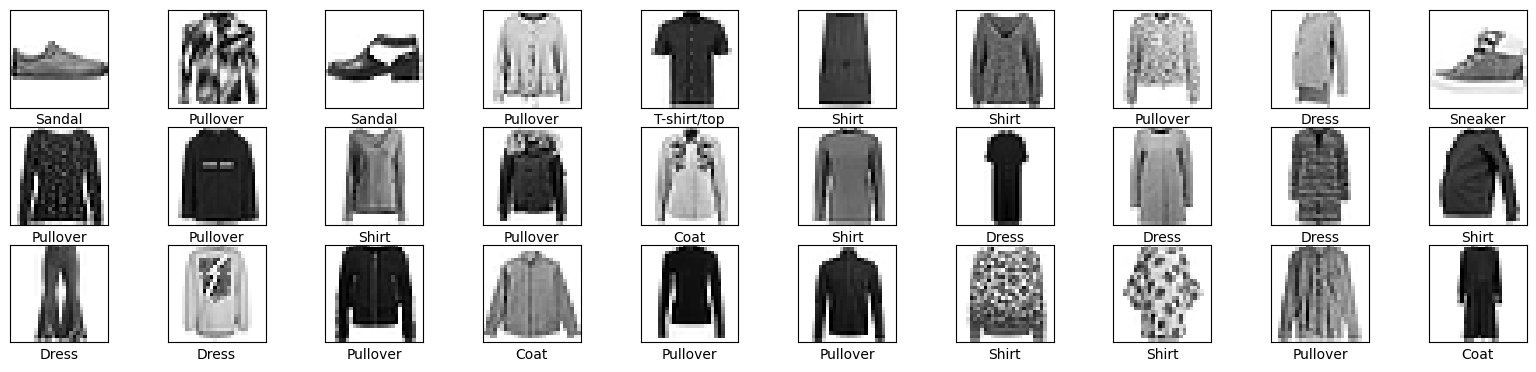

In [182]:
plt.figure(figsize=(20,15))
for i in range(30):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [183]:
import numpy as np

# Порівняння прогнозованих міток з правильними мітками
mask = predictions_all != y_test_1

# Отримання помилкових прогнозів та їх правильних міток
x_false = x_test_1[mask]
y_false = y_test_1[mask]

# Підрахунок кількості помилкових класифікацій для кожної цифри
false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"{class_names[digit]}: {count} помилкових класифікацій")

T-shirt/top: 130 помилкових класифікацій
Trouser: 27 помилкових класифікацій
Pullover: 150 помилкових класифікацій
Dress: 105 помилкових класифікацій
Coat: 219 помилкових класифікацій
Sandal: 33 помилкових класифікацій
Shirt: 325 помилкових класифікацій
Sneaker: 40 помилкових класифікацій
Bag: 25 помилкових класифікацій
Ankle boot: 40 помилкових класифікацій


In [184]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[870   0  22  19   4   1  77   0   7   0]
 [  2 973   3  18   2   1   1   0   0   0]
 [ 13   1 850  13  65   1  55   0   2   0]
 [ 25   8  18 895  27   0  21   0   6   0]
 [  2   1 137  33 781   0  44   0   2   0]
 [  0   0   1   0   0 967   0  20   1  11]
 [133   2  99  23  59   0 675   0   9   0]
 [  0   0   0   0   0  19   0 960   1  20]
 [  4   0   4   4   2   1   6   4 975   0]
 [  0   0   0   0   0   7   1  32   0 960]]


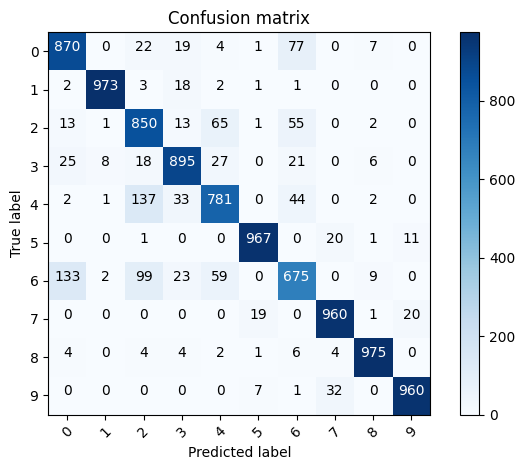

In [185]:
y_pred = np.argmax(model_t2.predict(x_test_1), axis=1)
cm = confusion_matrix(y_test_1, y_pred)
plot_confusion_matrix(cm, classes=range(10))

# Тренування Моделі 3

In [190]:
import time

start_time = time.time()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model_t3= keras.models.load_model("3_model")
history = model_t3.fit(x_train_1, y_train_1_categorical,
                       batch_size=256,
                       epochs=50,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])

end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")



Epoch 1/50
188/188 [==============================] - 9s 44ms/step - loss: 0.2631 - accuracy: 0.4664 - val_loss: 0.1547 - val_accuracy: 0.6692 - lr: 1.0000e-04
Epoch 2/50
188/188 [==============================] - 8s 41ms/step - loss: 0.1443 - accuracy: 0.6831 - val_loss: 0.1200 - val_accuracy: 0.7538 - lr: 1.0000e-04
Epoch 3/50
188/188 [==============================] - 7s 38ms/step - loss: 0.1204 - accuracy: 0.7503 - val_loss: 0.1055 - val_accuracy: 0.7721 - lr: 1.0000e-04
Epoch 4/50
188/188 [==============================] - 8s 42ms/step - loss: 0.1068 - accuracy: 0.7814 - val_loss: 0.0958 - val_accuracy: 0.8038 - lr: 1.0000e-04
Epoch 5/50
188/188 [==============================] - 7s 36ms/step - loss: 0.0987 - accuracy: 0.7995 - val_loss: 0.0906 - val_accuracy: 0.8178 - lr: 1.0000e-04
Epoch 6/50
188/188 [==============================] - 8s 42ms/step - loss: 0.0928 - accuracy: 0.8143 - val_loss: 0.0851 - val_accuracy: 0.8290 - lr: 1.0000e-04
Epoch 7/50
188/188 [====================

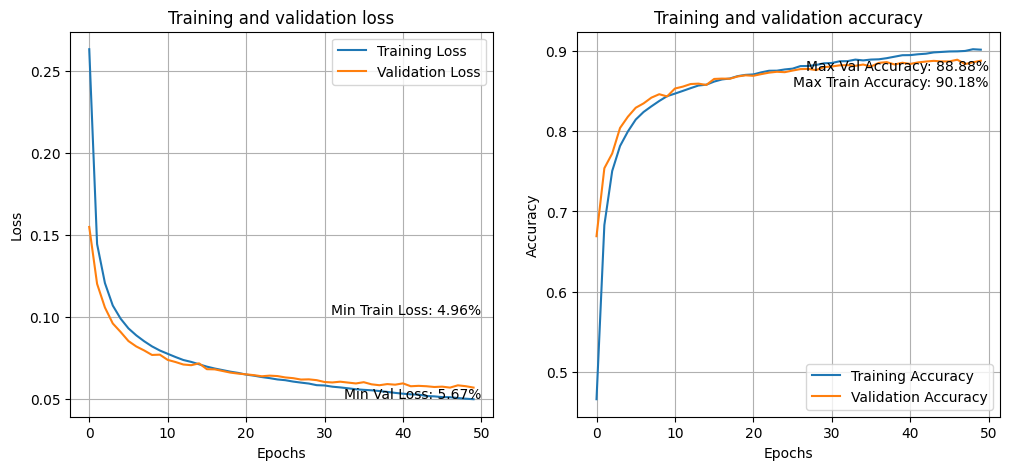

In [191]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']) + 0.05, f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='top', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']) - 0.05, f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='top', horizontalalignment='right')

plt.show()



In [192]:
import time

start_time = time.time()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model_t3= keras.models.load_model("3_model")
history = model_t3.fit(x_train_1, y_train_1_categorical,
                       batch_size=256,
                       epochs=100,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])

end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")


Epoch 1/100
188/188 [==============================] - 9s 43ms/step - loss: 0.2634 - accuracy: 0.4660 - val_loss: 0.1553 - val_accuracy: 0.6752 - lr: 1.0000e-04
Epoch 2/100
188/188 [==============================] - 7s 37ms/step - loss: 0.1448 - accuracy: 0.6810 - val_loss: 0.1217 - val_accuracy: 0.7458 - lr: 1.0000e-04
Epoch 3/100
188/188 [==============================] - 8s 40ms/step - loss: 0.1205 - accuracy: 0.7495 - val_loss: 0.1060 - val_accuracy: 0.7918 - lr: 1.0000e-04
Epoch 4/100
188/188 [==============================] - 8s 45ms/step - loss: 0.1066 - accuracy: 0.7820 - val_loss: 0.0945 - val_accuracy: 0.8099 - lr: 1.0000e-04
Epoch 5/100
188/188 [==============================] - 10s 53ms/step - loss: 0.0988 - accuracy: 0.8001 - val_loss: 0.0895 - val_accuracy: 0.8208 - lr: 1.0000e-04
Epoch 6/100
188/188 [==============================] - 8s 41ms/step - loss: 0.0928 - accuracy: 0.8135 - val_loss: 0.0874 - val_accuracy: 0.8230 - lr: 1.0000e-04
Epoch 7/100
188/188 [============

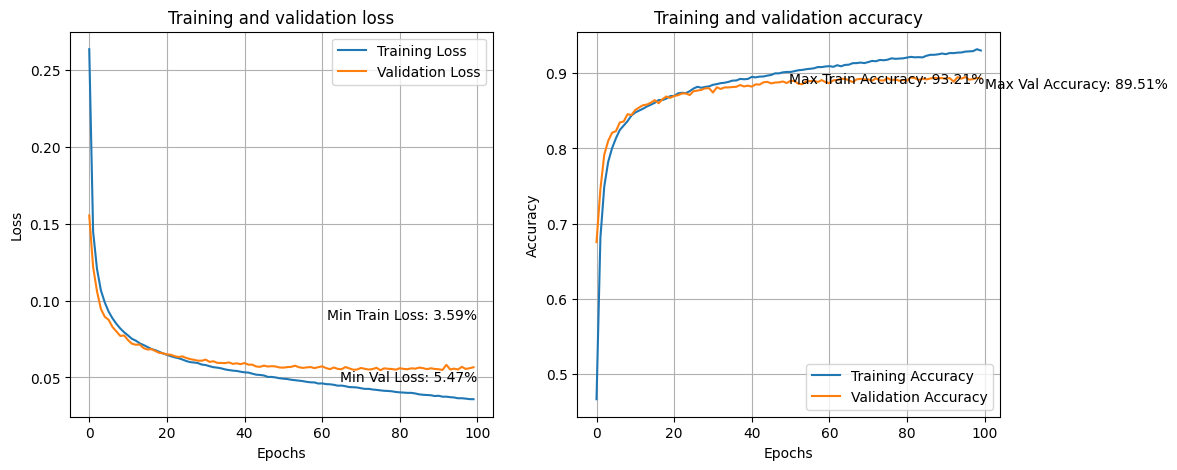

In [263]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']) + 0.05, f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='top', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']) - 0.05, f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='top', horizontalalignment='left')

plt.show()


на тренуванні моделі досягнули точності > 93%, точність валідації 89,51%

# Інші варіанти не більше 87%

In [203]:
!pip install scikeras

In [227]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.layers import Flatten, Dense



In [264]:
def create_model(num_layers=1, num_neurons=32, input_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'], weighted_metrics=[])

    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [265]:
print(model.get_params().keys())


dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])


In [266]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=256, verbose=0)


In [ ]:
from keras.callbacks import EarlyStopping

# Визначення зворотнього виклику EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

param_dist = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'loss': ['categorical_crossentropy', 'mean_squared_error'],
    'metrics': [['accuracy'], ['accuracy', 'precision', 'recall']],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'validation_split': [0.1, 0.2, 0.3],
    'callbacks': [[], [reduce_lr], [reduce_lr, early_stopping]],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search.fit(x_train_1, y_train_1_categorical)


In [237]:
print(random_search.best_params_)


{'validation_split': 0.2, 'optimizer': 'adam', 'metrics': ['accuracy'], 'loss': 'categorical_crossentropy', 'epochs': 20, 'class_weight': None, 'callbacks': [<keras.src.callbacks.ReduceLROnPlateau object at 0x7a50cc6b11e0>], 'batch_size': 64}


In [239]:
import pandas as pd

# Створення DataFrame з найкращими параметрами
best_params_df = pd.DataFrame([random_search.best_params_])

# Виведення таблиці з найкращими параметрами
print(best_params_df)



   validation_split optimizer     metrics                      loss  epochs  \
0               0.2      adam  [accuracy]  categorical_crossentropy      20   

  class_weight                                          callbacks  batch_size  
0         None  [<keras.src.callbacks.ReduceLROnPlateau object...          64  


In [245]:
df_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_validation_split,param_optimizer,param_metrics,param_loss,param_epochs,param_class_weight,param_callbacks,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.411205,0.817467,0.805436,0.158888,0.1,sgd,[accuracy],categorical_crossentropy,10,balanced,[<keras.src.callbacks.ReduceLROnPlateau object...,128,"{'validation_split': 0.1, 'optimizer': 'sgd', ...",0.86760,0.87020,0.86915,0.868983,0.001068,4
1,0.249364,0.006036,0.000000,0.000000,0.3,rmsprop,"[accuracy, precision, recall]",mean_squared_error,10,None,[<keras.src.callbacks.ReduceLROnPlateau object...,32,"{'validation_split': 0.3, 'optimizer': 'rmspro...",NaN,NaN,NaN,NaN,NaN,8
2,21.662115,0.026259,0.729380,0.128680,0.2,adam,"[accuracy, precision, recall]",categorical_crossentropy,20,balanced,[],128,"{'validation_split': 0.2, 'optimizer': 'adam',...",0.85670,0.87160,0.86935,0.865883,0.006558,5
3,37.932864,5.779302,1.096551,0.353354,0.2,adam,[accuracy],categorical_crossentropy,20,None,[<keras.src.callbacks.ReduceLROnPlateau object...,64,"{'validation_split': 0.2, 'optimizer': 'adam',...",0.86430,0.87665,0.88005,0.873667,0.006767,1
4,0.269481,0.031045,0.000000,0.000000,0.2,rmsprop,[accuracy],mean_squared_error,20,None,[<keras.src.callbacks.ReduceLROnPlateau object...,128,"{'validation_split': 0.2, 'optimizer': 'rmspro...",NaN,NaN,NaN,NaN,NaN,8
5,17.435928,2.991503,0.838305,0.006020,0.3,rmsprop,"[accuracy, precision, recall]",categorical_crossentropy,10,balanced,[],64,"{'validation_split': 0.3, 'optimizer': 'rmspro...",0.85635,0.87135,0.86985,0.865850,0.006745,6
6,75.158046,5.599500,1.487710,0.075112,0.3,rmsprop,"[accuracy, precision, recall]",categorical_crossentropy,30,None,[<keras.src.callbacks.ReduceLROnPlateau object...,32,"{'validation_split': 0.3, 'optimizer': 'rmspro...",0.86685,0.87600,0.87595,0.872933,0.004302,2
7,79.072002,4.312439,1.536923,0.040230,0.2,adam,"[accuracy, precision, recall]",categorical_crossentropy,30,None,[<keras.src.callbacks.ReduceLROnPlateau object...,32,"{'validation_split': 0.2, 'optimizer': 'adam',...",0.86395,0.87125,0.87805,0.871083,0.005758,3
8,0.458994,0.060448,0.000000,0.000000,0.3,adam,"[accuracy, precision, recall]",mean_squared_error,30,balanced,[<keras.src.callbacks.ReduceLROnPlateau object...,32,"{'validation_split': 0.3, 'optimizer': 'adam',...",NaN,NaN,NaN,NaN,NaN,8
9,19.675722,2.800353,1.272381,0.338032,0.2,adam,"[accuracy, precision, recall]",categorical_crossentropy,10,balanced,[],64,"{'validation_split': 0.2, 'optimizer': 'adam',...",0.86885,0.86990,0.85880,0.865850,0.005003,6


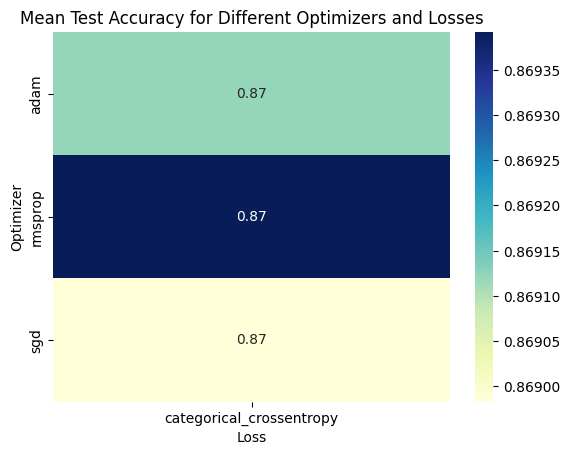

In [247]:
import seaborn as sns
import pandas as pd

# Отримання результатів пошуку
results = random_search.cv_results_

# Створення DataFrame з результатами
df_results = pd.DataFrame(results)

# Використання pivot_table замість pivot
heatmap_data = df_results.pivot_table(index='param_optimizer', columns='param_loss', values='mean_test_score', aggfunc='mean')

# Візуалізація
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Mean Test Accuracy for Different Optimizers and Losses')
plt.xlabel('Loss')
plt.ylabel('Optimizer')
plt.show()


<ipython-input-248-7c39918ec836>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = grouped_results.pivot('param_optimizer', 'param_loss', 'mean_test_score')


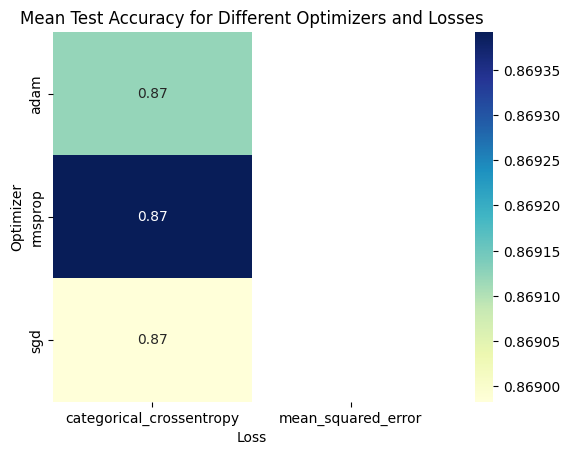

In [248]:
# Групування за оптимізатором та втратою, вибираючи середнє значення
grouped_results = df_results.groupby(['param_optimizer', 'param_loss'])['mean_test_score'].mean().reset_index()

# Побудова теплокарти
heatmap_data = grouped_results.pivot('param_optimizer', 'param_loss', 'mean_test_score')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Mean Test Accuracy for Different Optimizers and Losses')
plt.xlabel('Loss')
plt.ylabel('Optimizer')
plt.show()


In [ ]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], weighted_metrics=[])


In [267]:
from keras.callbacks import EarlyStopping

# Визначення зворотнього виклику EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

param_dist = {
    'optimizer': ['adam', 'rmsprop'],
    'loss': ['categorical_crossentropy'],
    'metrics': [['accuracy']],
    'batch_size': [256],
    'epochs': [100],
    'validation_split': [0.2],
    'callbacks': [[], [reduce_lr], [reduce_lr, early_stopping]],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', error_score=0, return_train_score=True)
random_search.fit(x_train_1, y_train_1_categorical)

# Отримання найкращих параметрів
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

# Перевірка, чи досягнута точність більше 91%
if best_accuracy > 0.91:
    print("Досягнута точність більше 91%!")
else:
    print("Точність не досягнута бажаного рівня.")


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Точність не досягнута бажаного рівня.


<ipython-input-268-7c39918ec836>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = grouped_results.pivot('param_optimizer', 'param_loss', 'mean_test_score')


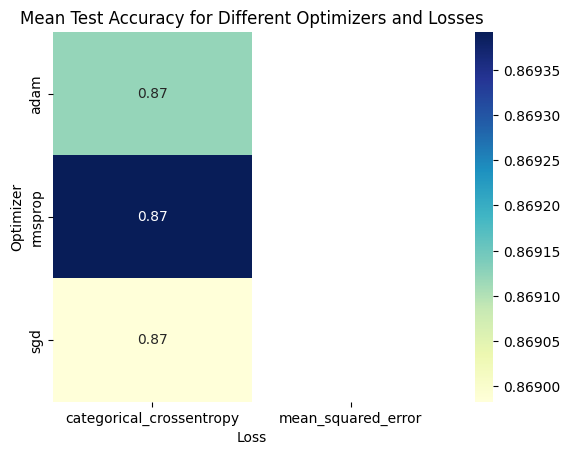

In [268]:
# Групування за оптимізатором та втратою, вибираючи середнє значення
grouped_results = df_results.groupby(['param_optimizer', 'param_loss'])['mean_test_score'].mean().reset_index()

# Побудова теплокарти
heatmap_data = grouped_results.pivot('param_optimizer', 'param_loss', 'mean_test_score')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Mean Test Accuracy for Different Optimizers and Losses')
plt.xlabel('Loss')
plt.ylabel('Optimizer')
plt.show()

In [269]:
# Створення DataFrame з найкращими параметрами
best_params_df = pd.DataFrame([random_search.best_params_])

# Виведення таблиці з найкращими параметрами
print(best_params_df)


   validation_split optimizer     metrics                      loss  epochs  \
0               0.2      adam  [accuracy]  categorical_crossentropy     100   

  class_weight callbacks  batch_size  
0         None        []         256  
